In [1]:
import logging
from utility import add_project_root_to_path

logging.basicConfig(level=logging.ERROR)

add_project_root_to_path()

In [2]:
# Building experiments configs

from experiments.configs import DATA_SOURCE_BY_ALIAS, DEFAULT_UNINFORMED_USERS_CONFIG
from experiments.experiment import Experiment
from user.informed_user import InformedUser

from fee_algorithm.fixed_fee import FixedFee
from fee_algorithm.discrete_fee_perfect_oracle import DiscreteFeePerfectOracle
from fee_algorithm.continuous_fee_perfect_oracle import ContinuousFeePerfectOracle
from fee_algorithm.fee_based_on_historical_price import FeeBasedOnHistoricalPrice

from copy import deepcopy

fee_algos_to_consider = {
    "fixed_fee": FixedFee(exchange_fee_rate=0.003), # 30 bps
    "discrete_fee_perfect_oracle": DiscreteFeePerfectOracle(fee_rate_in_arbitrage_direction=0.0045, fee_rate_in_non_arbitrage_direction=0.0015), # 45/15 bps
    "continuous_fee_perfect_oracle": ContinuousFeePerfectOracle(default_fee_rate=0.003), # 30 bps
    "fee_based_on_historical_price": FeeBasedOnHistoricalPrice(alpha=0.3, fee_in_increasing_deviation_direction=0.0045, fee_in_decreasing_deviation_direction=0.0015), # 45/15 bps
}

experiment_configs = {}

for period_alias in DATA_SOURCE_BY_ALIAS.keys():
    data_source = DATA_SOURCE_BY_ALIAS[period_alias]
    for fee_algo_alias, fee_algo in fee_algos_to_consider.items():
        experiment_name = f"{period_alias}_{fee_algo_alias}"
        experiment_configs[experiment_name] = Experiment(
            data=data_source,
            fee_algorithm=deepcopy(fee_algo),
            uninformed_users=deepcopy(DEFAULT_UNINFORMED_USERS_CONFIG),
            informed_user=InformedUser(),
        )

In [3]:
from pprint import pprint

pprint(experiment_configs['volatile_market_fixed_fee'])

Experiment(data=ExperimentData(start_time=datetime.datetime(2022, 11, 10, 12, 0), end_time=datetime.datetime(2022, 11, 16, 12, 0), A_symbol='ETH', B_symbol='SHIB', stable_coin_symbol='USDT', candle_interval='5m'), fee_algorithm=FixedFee(exchange_fee_rate=0.003), informed_user=<user.informed_user.InformedUser object at 0x1290ef7f0>, uninformed_users=UninformedUsersConfig(uninformed_user=<user.uninformed_user.UninformedUser object at 0x1290f0670>, probability_of_trade=0.5, n_users=1), total_tokens=100000, network_fee=5)


In [4]:
pprint(experiment_configs['volatile_market_fixed_fee'])

Experiment(data=ExperimentData(start_time=datetime.datetime(2022, 11, 10, 12, 0), end_time=datetime.datetime(2022, 11, 16, 12, 0), A_symbol='ETH', B_symbol='SHIB', stable_coin_symbol='USDT', candle_interval='5m'), fee_algorithm=FixedFee(exchange_fee_rate=0.003), informed_user=<user.informed_user.InformedUser object at 0x1290ef7f0>, uninformed_users=UninformedUsersConfig(uninformed_user=<user.uninformed_user.UninformedUser object at 0x1290f0670>, probability_of_trade=0.5, n_users=1), total_tokens=100000, network_fee=5)


In [ ]:
from experiments.run_experiment import run_experiment
from experiments.experiment import ExperimentResult
import numpy as np

experiment_results: dict[str, ExperimentResult] = {}


for experiment_name, experiment_config in experiment_configs.items():
    np.random.seed(0)
    experiment_results[experiment_name] = run_experiment(experiment_config)

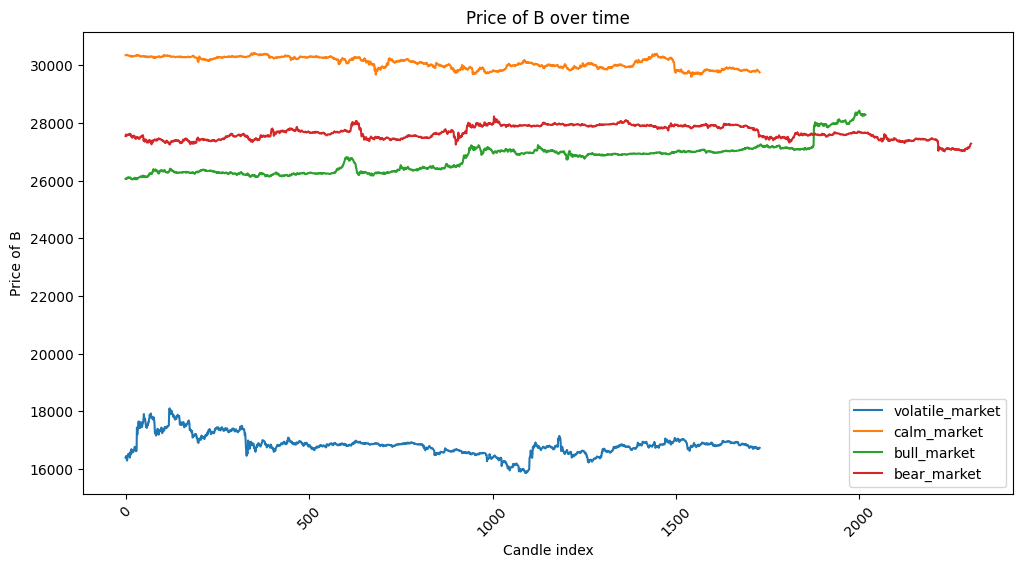

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for period_alias in DATA_SOURCE_BY_ALIAS.keys():
    experiment_name = f"{period_alias}_fixed_fee"
    experiment_result = experiment_results[experiment_name]
    plt.plot(experiment_result.data["price_B"], label=period_alias)
    plt.title("Price of B over time")

plt.ylabel("Price of B")
plt.xlabel("Candle index")
# plt.yscale("log")

plt.xticks(rotation=45)

plt.legend(loc="lower right")

plt.show()

### Results

In [6]:
from visualizations.compare_fee_algoritms import plot_participants_markouts, plot_impermanent_loss, get_experiment_summary

In [7]:
def plot_results_for_period(period_alias: str, fee_algos_to_consider: list[str]):
    plot_participants_markouts(
        period_alias,
        {
            f"{fee_algo_alias}": experiment_results[f"{period_alias}_{fee_algo_alias}"]
            for fee_algo_alias in fee_algos_to_consider
        }
    )
    plot_impermanent_loss(
        period_alias,
        {
            f"{fee_algo_alias}": experiment_results[f"{period_alias}_{fee_algo_alias}"]
            for fee_algo_alias in fee_algos_to_consider
        }
    )

    summary = get_experiment_summary(
        {
            f"{fee_algo_alias}": experiment_results[f"{period_alias}_{fee_algo_alias}"]
            for fee_algo_alias in fee_algos_to_consider
        }
    )

    display(summary)

### Results for bull market

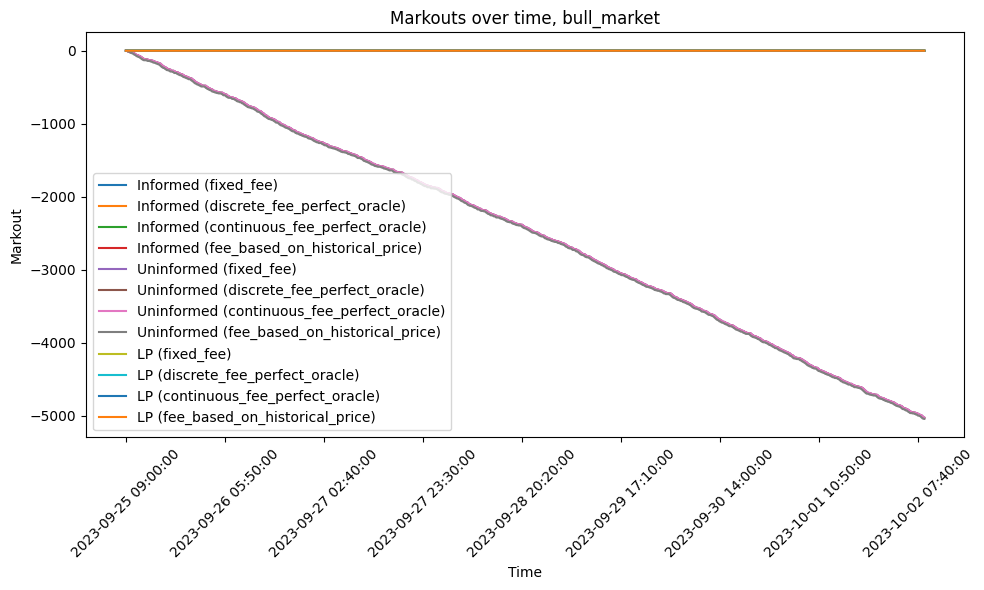

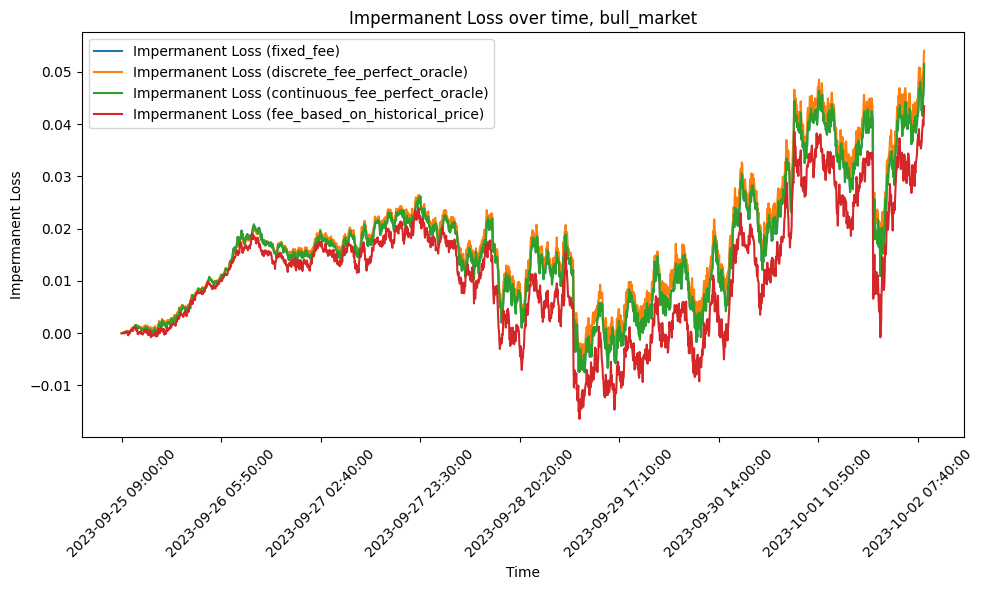

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,0,-5030.076565,0.076565,0.051529
1,discrete_fee_perfect_oracle,0,-5030.078040,0.078040,0.054039
2,continuous_fee_perfect_oracle,0,-5030.076459,0.076459,0.051438
3,fee_based_on_historical_price,0,-5045.075235,0.075235,0.043442


In [11]:
plot_results_for_period("bull_market", list(fee_algos_to_consider.keys()))

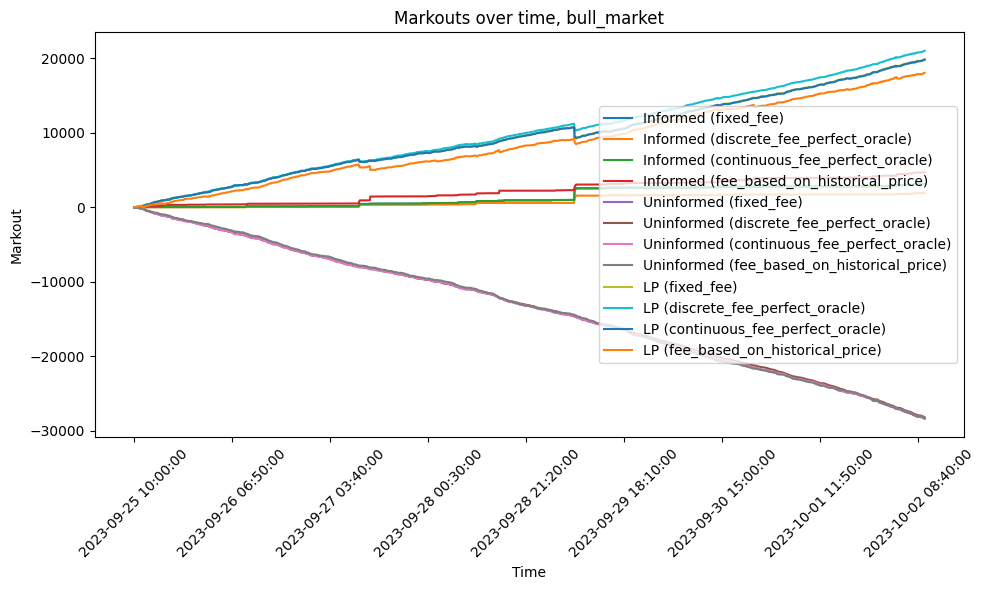

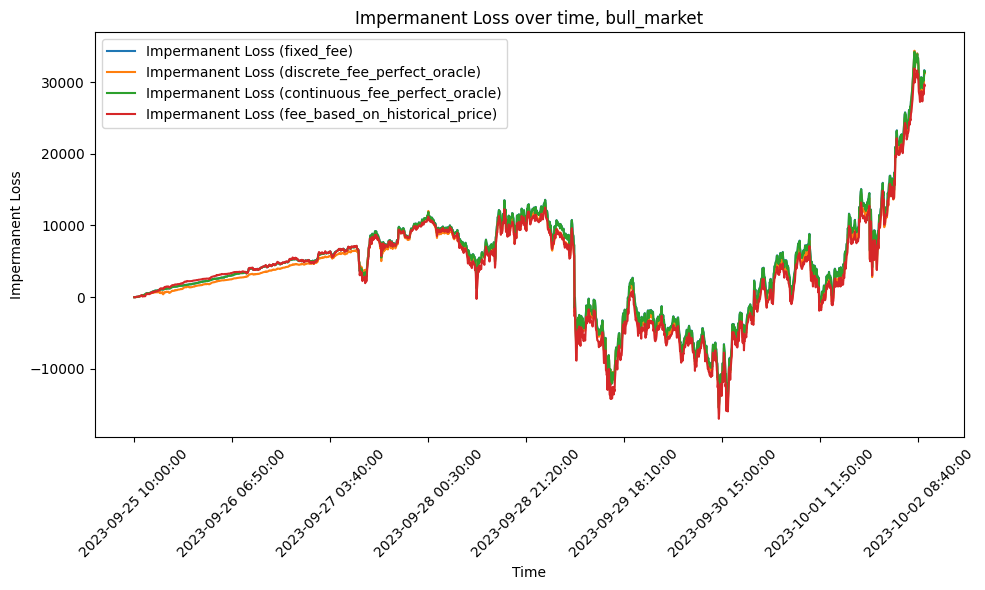

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,3111.051565,-28409.603177,19878.551612,31478.038405
1,discrete_fee_perfect_oracle,1911.919492,-28213.424969,21011.505477,31232.155324
2,continuous_fee_perfect_oracle,3100.658833,-28339.846453,19819.187619,31415.398813
3,fee_based_on_historical_price,4669.538533,-28328.387790,18048.849257,29506.349645


In [9]:
plot_results_for_period("bull_market", list(fee_algos_to_consider.keys()))

### Results for calm market

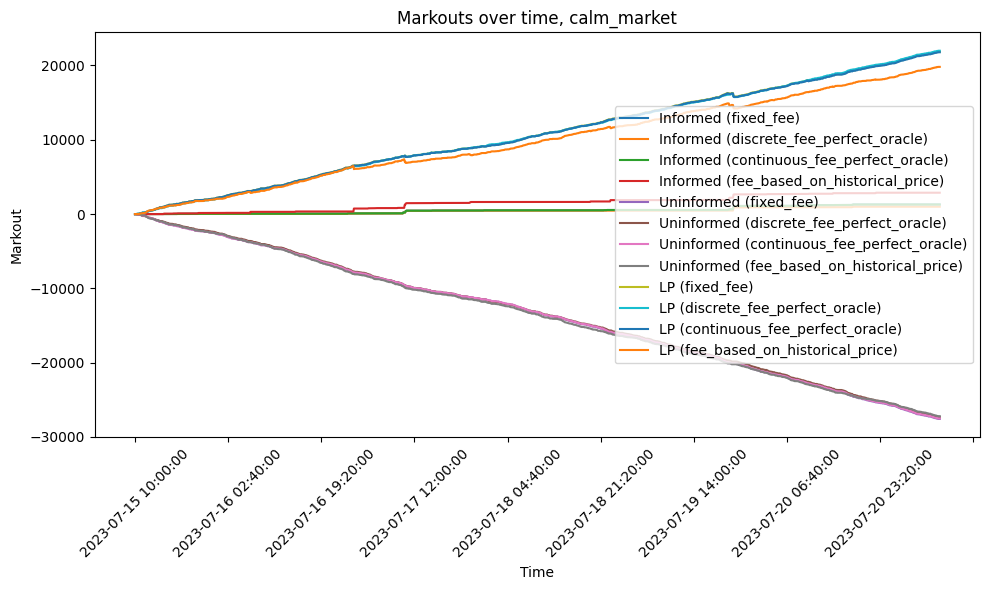

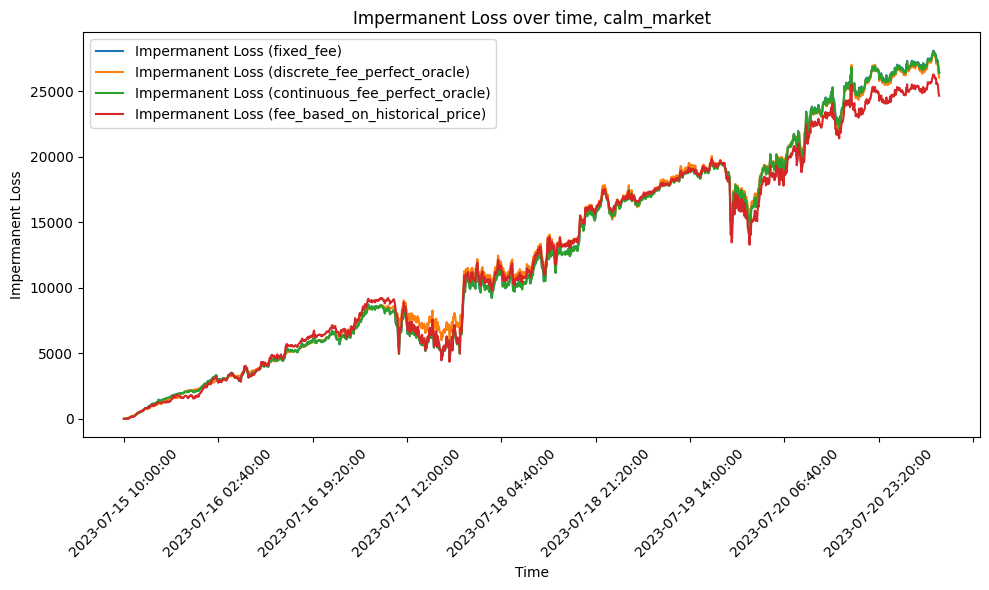

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,1293.385159,-27567.176580,21843.791422,26475.020899
1,discrete_fee_perfect_oracle,990.609052,-27322.501596,21981.892544,26058.394527
2,continuous_fee_perfect_oracle,1288.980380,-27497.500189,21778.519809,26410.568307
3,fee_based_on_historical_price,2875.334215,-27199.895582,19809.561367,24672.760162


In [10]:
plot_results_for_period("calm_market", list(fee_algos_to_consider.keys()))

### Results for bear market

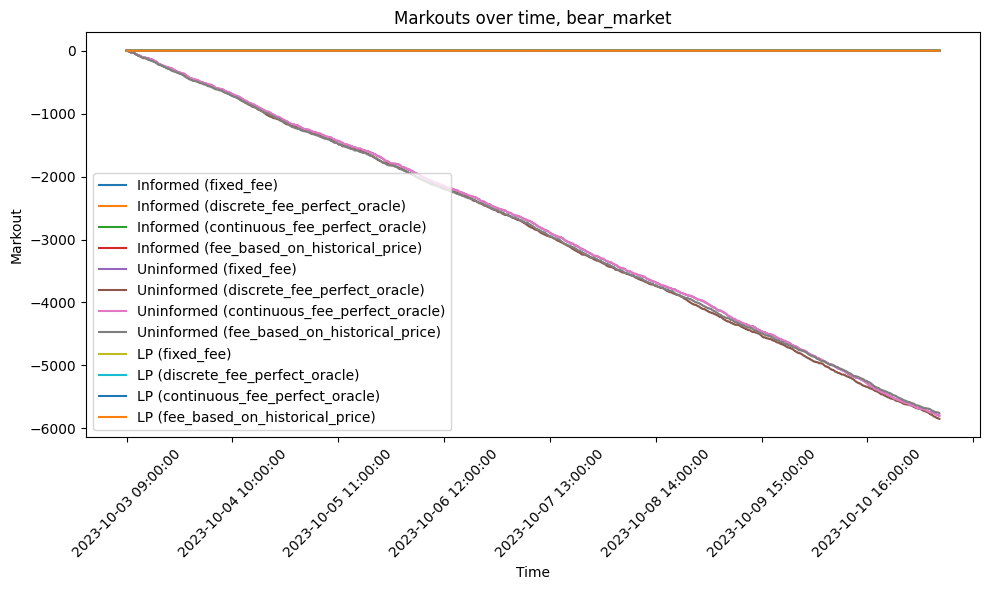

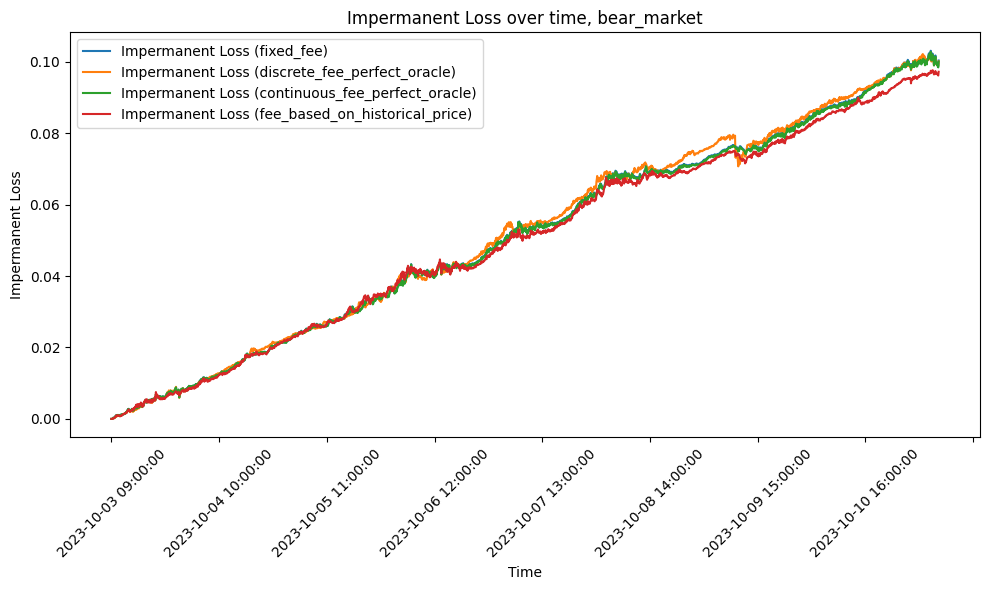

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,0,-5800.108643,0.108643,0.100354
1,discrete_fee_perfect_oracle,0,-5850.112333,0.112333,0.100086
2,continuous_fee_perfect_oracle,0,-5800.108327,0.108327,0.100047
3,fee_based_on_historical_price,0,-5760.104167,0.104167,0.097197


In [9]:
plot_results_for_period("bear_market", list(fee_algos_to_consider.keys()))

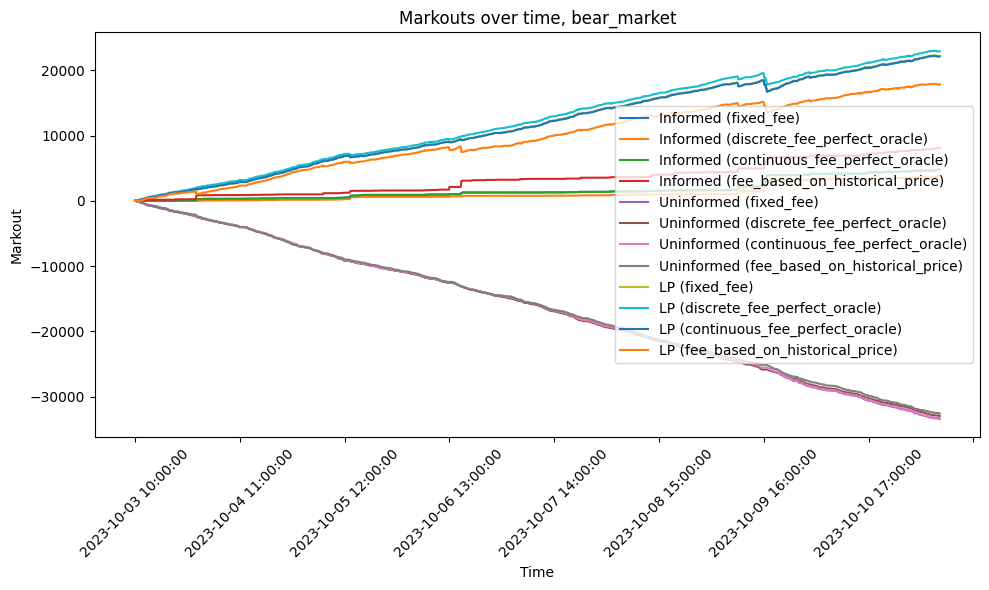

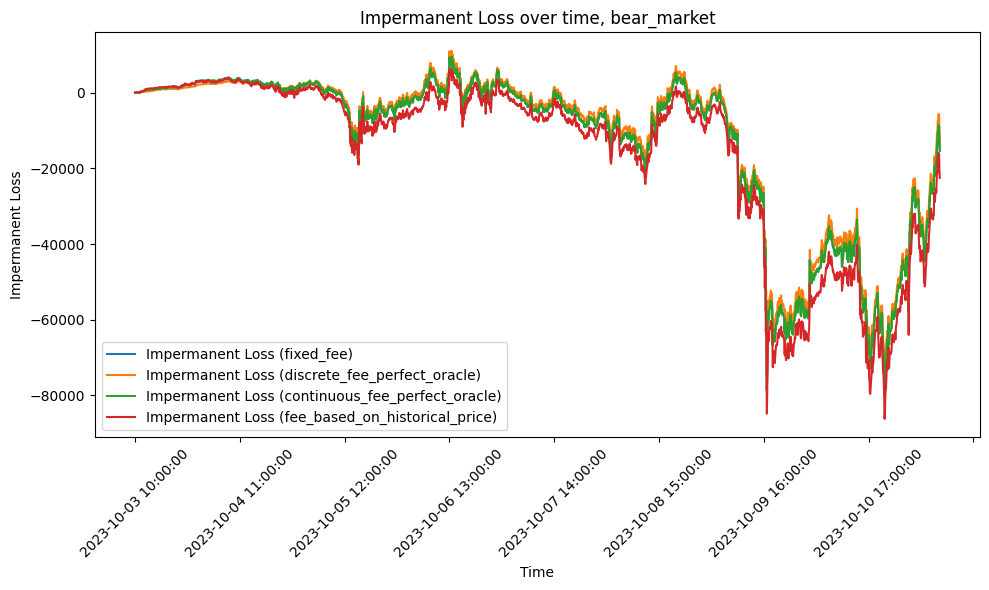

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,4774.547371,-33416.127998,22216.580628,-15310.374463
1,discrete_fee_perfect_oracle,3771.106556,-32973.724751,22937.618194,-12682.716487
2,continuous_fee_perfect_oracle,4758.291135,-33333.582227,22150.291092,-15375.411207
3,fee_based_on_historical_price,8105.730639,-32586.310565,17870.579927,-22524.850742


In [11]:
plot_results_for_period("bear_market", list(fee_algos_to_consider.keys()))

### Results for volatile market

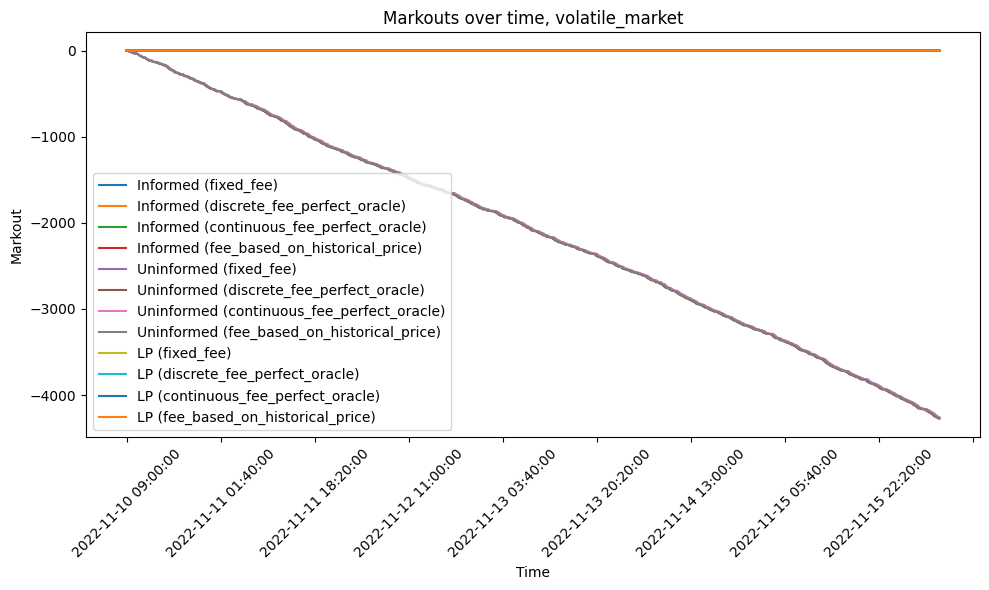

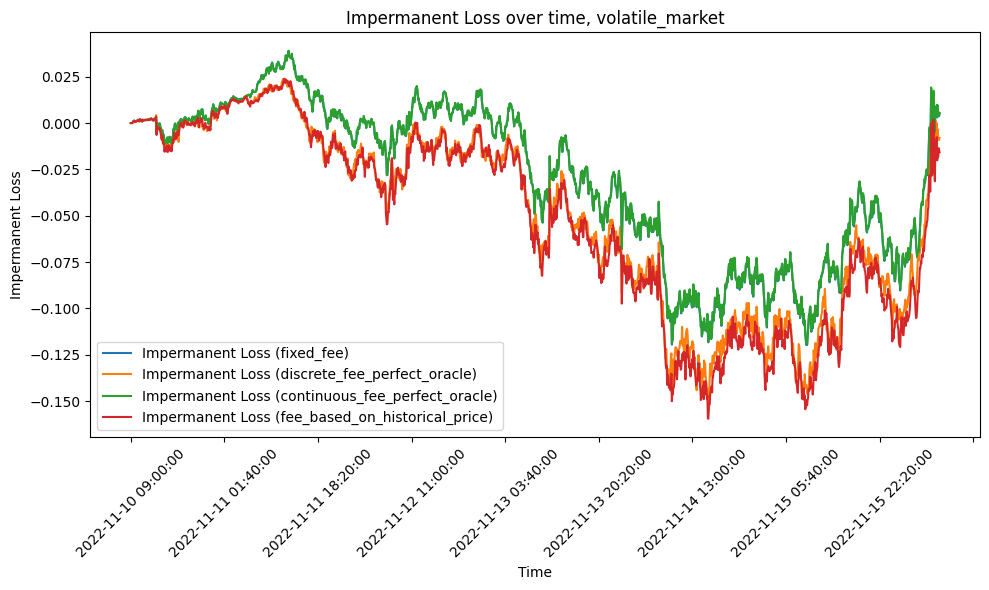

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,0,-4259.998246,-0.001754,0.005005
1,discrete_fee_perfect_oracle,0,-4275.009495,0.009495,-0.008082
2,continuous_fee_perfect_oracle,0,-4259.998799,-0.001201,0.005505
3,fee_based_on_historical_price,0,-4265.000288,0.000288,-0.015784


In [10]:
plot_results_for_period("volatile_market", list(fee_algos_to_consider.keys()))

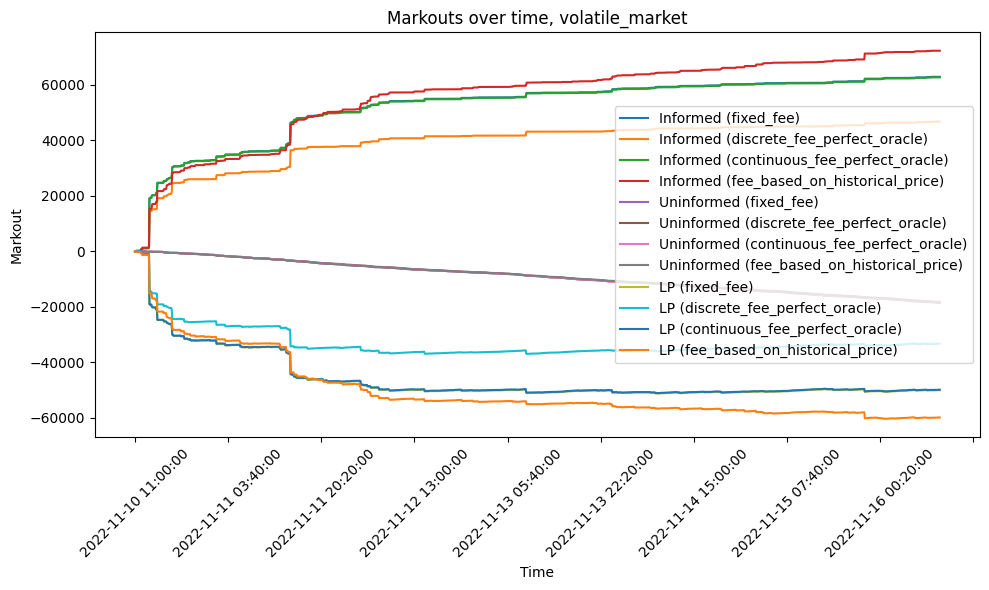

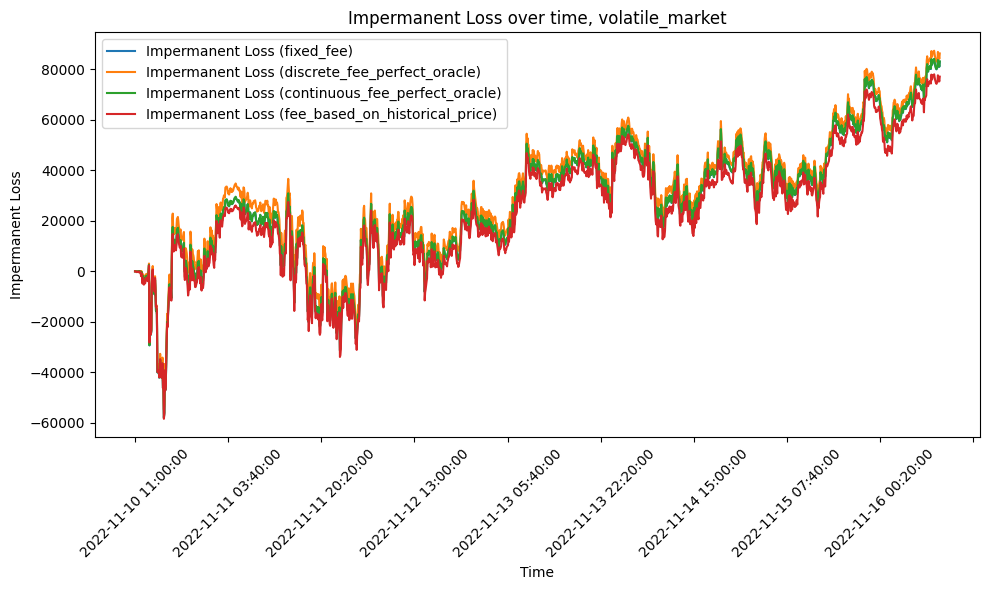

,experiment_name,informed_user_markout,uninformed_user_markout,lp_markout,impermanent_loss
0,fixed_fee,62912.443037,-18390.653397,-50051.789640,82931.016036
1,discrete_fee_perfect_oracle,46737.043455,-18522.004182,-33305.039273,86214.493931
2,continuous_fee_perfect_oracle,62719.918082,-18348.472752,-49901.445330,83076.857866
3,fee_based_on_historical_price,72315.760583,-18260.851008,-59904.909575,77038.013317


In [12]:
plot_results_for_period("volatile_market", list(fee_algos_to_consider.keys()))

In [21]:
from experiments.experiment import ExperimentResult
from utility import fix_x_axis_labels
from typing import Optional

def plot_fee_algo_price_ema_vs_price(experiment_result: ExperimentResult, first_updates: Optional[int] = None):
    all_snapshots = experiment_result.simulation_result.snapshots
    if first_updates is not None:
        all_snapshots = all_snapshots[:first_updates]

    fee_algo_price_ema = []
    for snapshot in all_snapshots:
        fee_algo_price_ema.append(snapshot.pool.fee_algorithm.a_to_b_price_ema.average())
    
    real_prices = []
    for snapshot in all_snapshots:
        real_prices.append(snapshot.pool.get_a_to_b_exchange_price())
    

    all_timestamps = experiment_result.simulation_result.timestamps
    if first_updates is not None:
        all_timestamps = all_timestamps[:first_updates]

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(all_timestamps, fee_algo_price_ema, label="EMA of price from fee algorithm")
    ax.plot(all_timestamps, real_prices, label="Real price")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Price")
    ax.legend(loc="upper right")
    plt.title("EMA of price from fee algorithm vs real price")

    fix_x_axis_labels(ax)

    plt.xticks(rotation=45)

    plt.show()

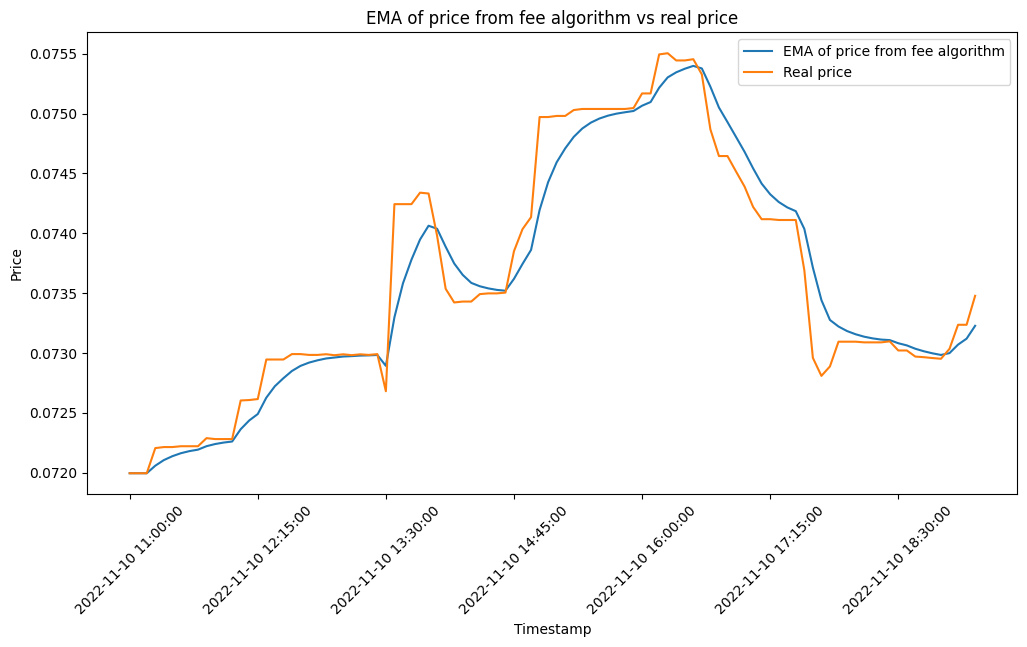

In [22]:
plot_fee_algo_price_ema_vs_price(
    experiment_results["volatile_market_fee_based_on_historical_price"], first_updates=100
)